# 4. Topic modelling

This notebook will introduce you to the basics of topic modelling. 
You'll learn how identify topics in documents using the tf-idf matrix and ML classifier.







Legend of symbols:

- 🤓: Tips

- 🤖📝: Your turn

- ❓: Question

- 💫: Extra exercise 

## 3.1. Tf-idf matrix + ML classifier

In this section, we'll learn how to do topic modelling based on bag of words and ML classification.

### 3.1.1. Build tf-idf matrix

First, let's import the news dataset:

In [2]:
import pandas as pd

df = pd.read_csv('../data/news.csv')

In [17]:
len(df)

1634

In [3]:
df.head()

,topic,media,corpus,headline,link
0,climatic,The Guardian,The reindeer is the emblematic Christmas anima...,Weatherwatch: reindeer adapted to snow but not...,https://www.theguardian.com/world/2019/dec/23/...
1,climatic,The Guardian,The European parliament is split over whether ...,European parliament split on declaring climate...,https://www.theguardian.com/world/2019/nov/26/...
2,climatic,The Guardian,Fisayo Soyombo was eating an evening snack in ...,‘Climate of fear’: Nigeria intensifies crackdo...,https://www.theguardian.com/world/2019/nov/14/...
3,climatic,The Guardian,The European Union considers itself as a leade...,EU's soaring climate rhetoric not always match...,https://www.theguardian.com/world/2019/dec/11/...
4,climatic,The Guardian,"Good morning, we’re now exactly two weeks out ...",Thursday briefing: Political climate too hot f...,https://www.theguardian.com/world/2019/nov/28/...


To begin with, we need to build a **tf-idf matrix** with the corpus. Let's start with cleaning the text:

In [25]:
# We are going to start with applying a first round of data cleaning (square brackets, lower case)  
import re
import string

def clean_text(text):
    """
    This function
    makes text lowercase, 
    remove text in square brackets, 
    remove punctuation and 
    remove words containing numbers.
    """
    text = str(text).lower() # make text lower case
    text = re.sub('\[.*?\]', '', str(text)) # remove text in square brackets
    text = re.sub('[%s]' % re.escape(string.punctuation), '', str(text)) # remove punctuation
    text = re.sub('\w*\d\w*', '', str(text)) # remove words containing numbers.
    return text

df['corpus_clean'] = df['corpus'].apply(clean_text)

In [24]:
df['corpus_clean'].head()

0    the reindeer is the emblematic christmas anima...
1    the european parliament is split over whether ...
2    fisayo soyombo was eating an evening snack in ...
3    the european union considers itself as a leade...
4    good morning we’re now exactly two weeks out f...
Name: corpus_clean, dtype: object

Now the text is cleaned, we're ready to build the tf-idf matrix:

In [54]:
# We are going to create a document-term matrix using TfidfVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(max_features = 200, stop_words='english')
data_cv = vec.fit_transform(df.corpus_clean)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=vec.get_feature_names())
data_dtm.index = df.index
data_dtm.head()


,abuse,according,action,africa,african,aid,american,army,article,attack,...,white,woman,women,work,workers,working,world,year,years,young
0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.176560,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.053168,0.051550,0.039165
2,0.000000,0.083860,0.000000,0.0,0.0,0.0,0.0,0.109019,0.092743,0.000000,...,0.000000,0.000000,0.00000,0.078041,0.0,0.000000,0.000000,0.061938,0.060053,0.000000
3,0.000000,0.000000,0.111860,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.084885,0.0,0.000000,0.075622,0.000000,0.000000,0.000000
4,0.054005,0.041947,0.102885,0.0,0.0,0.0,0.0,0.054533,0.000000,0.058097,...,0.059158,0.056128,0.04439,0.039037,0.0,0.045472,0.069555,0.061964,0.030039,0.000000


🤓 As you might realised, there exists words (columns) that express the same idea: (woman, women), (work, workers, working). So, we need to use lemmatization or stemming. 

In [55]:
import spacy
nlp = spacy.load('en_core_web_sm')
from nltk import SnowballStemmer
stemmer = SnowballStemmer('english')

def stemming(new):
    """
    This function reduces 
    words to stems.
    """
    tokens = [[token.text for token in sentence] for sentence in nlp(new).sents]
    stems = [[stemmer.stem(token) for token in sentence] for sentence in tokens]
    stems = " ".join(str(token) for token in stems)
    return stems

df['corpus_stem'] = df['corpus_clean'].apply(stemming)

In [42]:
df['corpus_stem'].head()

0    ['the', 'reindeer', 'is', 'the', 'emblemat', '...
1    ['the', 'european', 'parliament', 'is', 'split...
2    ['fisayo', 'soyombo', 'was', 'eat', 'an', 'eve...
3    ['the', 'european', 'union', 'consid', 'itself...
4    ['good', 'morn', 'we', 're', 'now', 'exact', '...
Name: corpus_stem, dtype: object

Now, let's compute the tf-idf matrix again:

In [47]:
data_cv = vec.fit_transform(df.corpus_stem)
data_dtm_stem = pd.DataFrame(data_cv.toarray(), columns=vec.get_feature_names())
data_dtm_stem.index = df.index
data_dtm_stem.head()

,abus,accord,act,action,ad,age,aid,alleg,allow,american,...,water,way,week,white,women,work,worker,world,year,young
0,0,0,0,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
1,0,1,1,4,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,4,1
2,0,1,0,0,0,0,0,3,0,0,...,0,0,1,0,0,1,0,0,2,0
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,2,1,0,2,0,1,0,1,0,0,...,0,0,2,1,1,2,0,2,3,0


Now, we will add the topic of each document by adding the topic column to **<tt> data_dtm_stem <tt>**.

In [79]:
df_ml = pd.concat([data_dtm_stem.reset_index(drop=True), df.topic.reset_index(drop=True)], axis=1)
df_ml.head()

,abus,accord,act,action,ad,age,aid,alleg,allow,american,...,way,week,white,women,work,worker,world,year,young,topic
0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,climatic
1,0,1,1,4,0,0,0,0,0,0,...,0,1,0,0,0,0,0,4,1,climatic
2,0,1,0,0,0,0,0,3,0,0,...,0,1,0,0,1,0,0,2,0,climatic
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,climatic
4,2,1,0,2,0,1,0,1,0,0,...,0,2,1,1,2,0,2,3,0,climatic


### 🤖📝 **Your turn**

Build a **<tt> data_dtm_lem <tt>** using lemmatization. Is there any difference?

### 3.1.2. Build machine learning classifier

Now, we are ready to classify a ML algorithm to **detect** which new corresponds to climatic change on the dataset.

To do so, we're going to apply a *decision tree* classifier.

🌍 https://scikit-learn.org/stable/modules/tree.html

🌍 https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

First, we'll create a dummy variable that shows which new correponds to climatic topic:

In [82]:
df_ml['topic_climatic_dummy'] = 0

df_ml.loc[df['topic'] == 'climatic', 'topic_climatic_dummy'] = 1

In [83]:
df_ml.head()

,abus,accord,act,action,ad,age,aid,alleg,allow,american,...,week,white,women,work,worker,world,year,young,topic,topic_climatic_dummy
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,climatic,1
1,0,1,1,4,0,0,0,0,0,0,...,1,0,0,0,0,0,4,1,climatic,1
2,0,1,0,0,0,0,0,3,0,0,...,1,0,0,1,0,0,2,0,climatic,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,climatic,1
4,2,1,0,2,0,1,0,1,0,0,...,2,1,1,2,0,2,3,0,climatic,1


We will split the dataset into training and testing.  **<tt> Sklearn <tt>** has already a function thas does it:

In [88]:
from sklearn.model_selection import train_test_split

df_train, df_test, topic_train, topic_test = train_test_split(df_ml.iloc[:,:-2], df_ml.iloc[:,-1], test_size=0.33, random_state=42)

And now, let's train our classifier with our training data:

In [89]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=4)
dt = dt.fit(df_train, topic_train)

Finally, we test the performance of the classifier with our testing data:

In [90]:
from sklearn.metrics import accuracy_score

topic_pred = dt.predict(df_test)
score = accuracy_score(topic_test, topic_pred)

score

0.9685185185185186

Oh wow! Our decision tree correclty classifies 96.85% of news

Let's inspect the tree:

🌍 https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py

In [94]:
from sklearn import tree
import graphviz 

dot_data = tree.export_graphviz(dt, out_file=None) 
graph = graphviz.Source(dot_data) 

dot_data = tree.export_graphviz(dt, out_file=None, 
                      feature_names=df_train.columns,    
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  

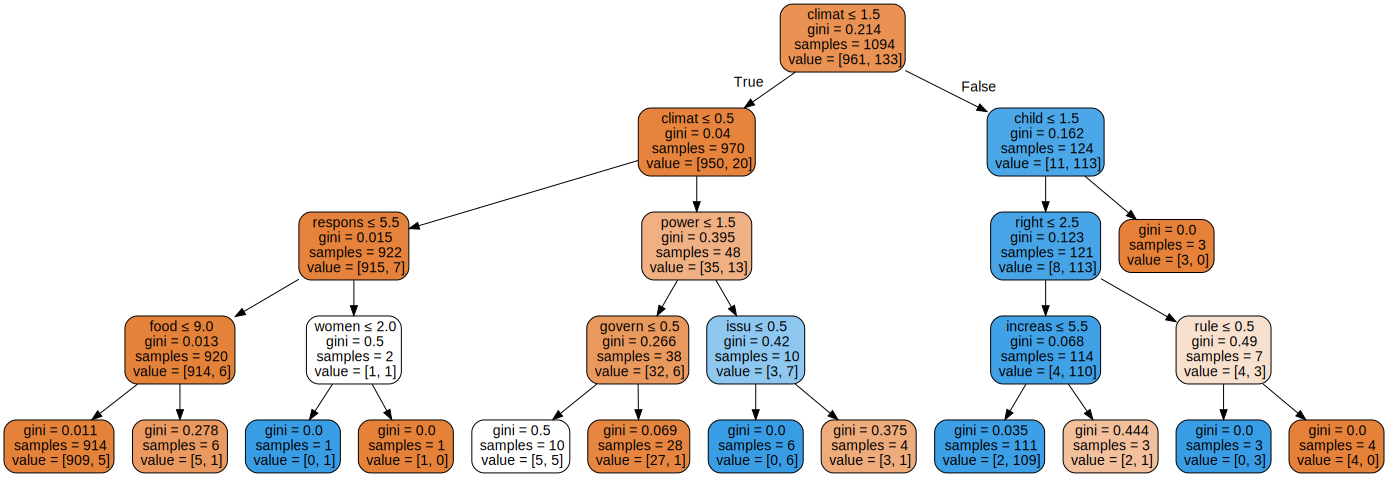

In [95]:
graph

### 🤖📝 **Your turn**

Build a classifier to classify *child _soldiers*.

In [ ]:
df_ml['topic_child_soldiers_dummy'] = 0

df_ml.loc[df['topic'] == 'child soldiers', 'topic_child_soldiers_dummy'] = 1